In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stat
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
import pickle
from sklearn.metrics import *
import pandas as pd
import seaborn as sns
sns.set_theme()

In [2]:
from dual_with_transfer_quantiles import dual_model_sudden, dual_model_gradual
from single_quantiles_with_transfer import model_sudden, model_gradual

In [3]:
# read fit values
fits_single = pickle.load(open('fit_single_ll_transfer_test_rep.pickle', 'rb'))
fits_dual = pickle.load(open('fit_dual_ll_transfer_test_rep.pickle', 'rb'))
fits_single_model_recovery = pickle.load(open('params/fit_single_bound_with_transfer_model_recovery.pickle', 'rb'))
fits_dual_model_recovery = pickle.load(open('params/fit_dual_bound_with_transfer_model_recovery.pickle', 'rb'))

curvatures_smooth = pickle.load(open('curvatures_smooth.pickle', 'rb'))
curvatures_smooth = curvatures_smooth/90.0
curvatures = pickle.load(open('curvatures.pickle', 'rb'))

In [4]:
def plot_data_vs_fits_dual(curvatures_smooth, Af, Bf, As, Bs):
    plt.figure(figsize = (20, 10))
    errors_predict = np.zeros((60, 704))
    fast = np.zeros((60, 704))
    slow = np.zeros((60, 704))
    rotation_est = np.zeros((60, 704))
    corr_coef = np.zeros(60)
    for participant in range(60):
        if participant % 4 == 0 or participant%4 == 1:
            errors_predict[participant], rotation_est[participant], fast[participant], slow[participant] = dual_model_sudden(704, Af[participant], Bf[participant], As[participant], Bs[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]
        else:    
            errors_predict[participant], rotation_est[participant], fast[participant], slow[participant] = dual_model_gradual(704, Af[participant], Bf[participant], As[participant], Bs[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]

    fig, ax = plt.subplots(4, dpi = 300, sharex = True, constrained_layout = True, figsize = (25, 15))
    plt.setp(ax, ylim=(-1, 2))
    legend_size = 15
    for participant in range(4):
        if participant%4 == 0  or participant%4 == 1:
            #plt.plot(np.nanmean(errors_predict[participant::4], axis = 0))
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l2, = ax[participant].plot(np.nanmean(fast[participant::4], axis = 0))
            l3, = ax[participant].plot(np.nanmean(slow[participant::4], axis = 0))
            l4, = ax[participant].plot(np.append(np.ravel(np.nanmean(1 - curvatures_smooth[participant::4], axis = 0)[1:-1]), np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l2, l3, l4], ['Rotation Est', 'Fast Est', 'Slow Est', 'Rotation Est Data'], prop={'size': legend_size})
        else:
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l2, = ax[participant].plot(np.nanmean(fast[participant::4], axis = 0))
            l3, = ax[participant].plot(np.nanmean(slow[participant::4], axis = 0))
            cs = np.zeros((704))
            csm = np.nanmean(curvatures_smooth[participant::4], axis = 0)
            for i in range(9):
                cs[i*64:(i+1)*64] = (i+1)*10/90.0 - csm[i+1]
            cs[576:640] = 1 - csm[10]
            cs[640:] = csm[11]
            l4, = ax[participant].plot(cs)
            #plt.plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), -np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l2, l3, l4], ['Rotation Est', 'Fast Est', 'Slow Est', 'Rotation Est Data'], prop = {'size' : legend_size})


        ax[participant].plot(np.zeros(704), color = 'black')
        ax[0].set_ylabel('Sudden \n Speed', fontsize = 15)
        ax[1].set_ylabel('Sudden \n Accuracy', fontsize = 15)
        ax[2].set_ylabel('Gradual \n Speed', fontsize = 15)
        ax[3].set_ylabel('Gradual \n Accuracy', fontsize = 15)
    fig.suptitle('Dual Model Predictions', fontsize = 20)
    return corr_coef


array([ 0.5642314 ,  0.82465274,  0.7232517 ,  0.80171413,  0.53535392,
        0.66693535,  0.86287919,  0.86856853,  0.55612389,  0.74780918,
        0.69613929,  0.83888005,  0.77070766,  0.83804557,  0.82185251,
        0.85888804, -0.04976808,  0.72342446,  0.68051884,  0.76860777,
        0.83924986,  0.9042556 ,  0.36088461,  0.65696842,  0.47536821,
        0.86525202,  0.53174039,  0.75219761,  0.55589076,  0.85059404,
        0.79513314,  0.91145936,  0.59206521,  0.74984878,  0.83774945,
        0.82368213,  0.69498673,  0.62473803,  0.74775616,  0.88910462,
        0.95734592,  0.7194178 ,  0.31954207,  0.70847827,  0.84351498,
        0.79365813,  0.85626761,  0.86738127,  0.78722622,  0.59340939,
        0.69449822,  0.56509203,  0.6694102 ,  0.36674178,  0.41748523,
        0.78425662,  0.64977773,  0.62033635,  0.62750002,  0.71314201])

<Figure size 1440x720 with 0 Axes>

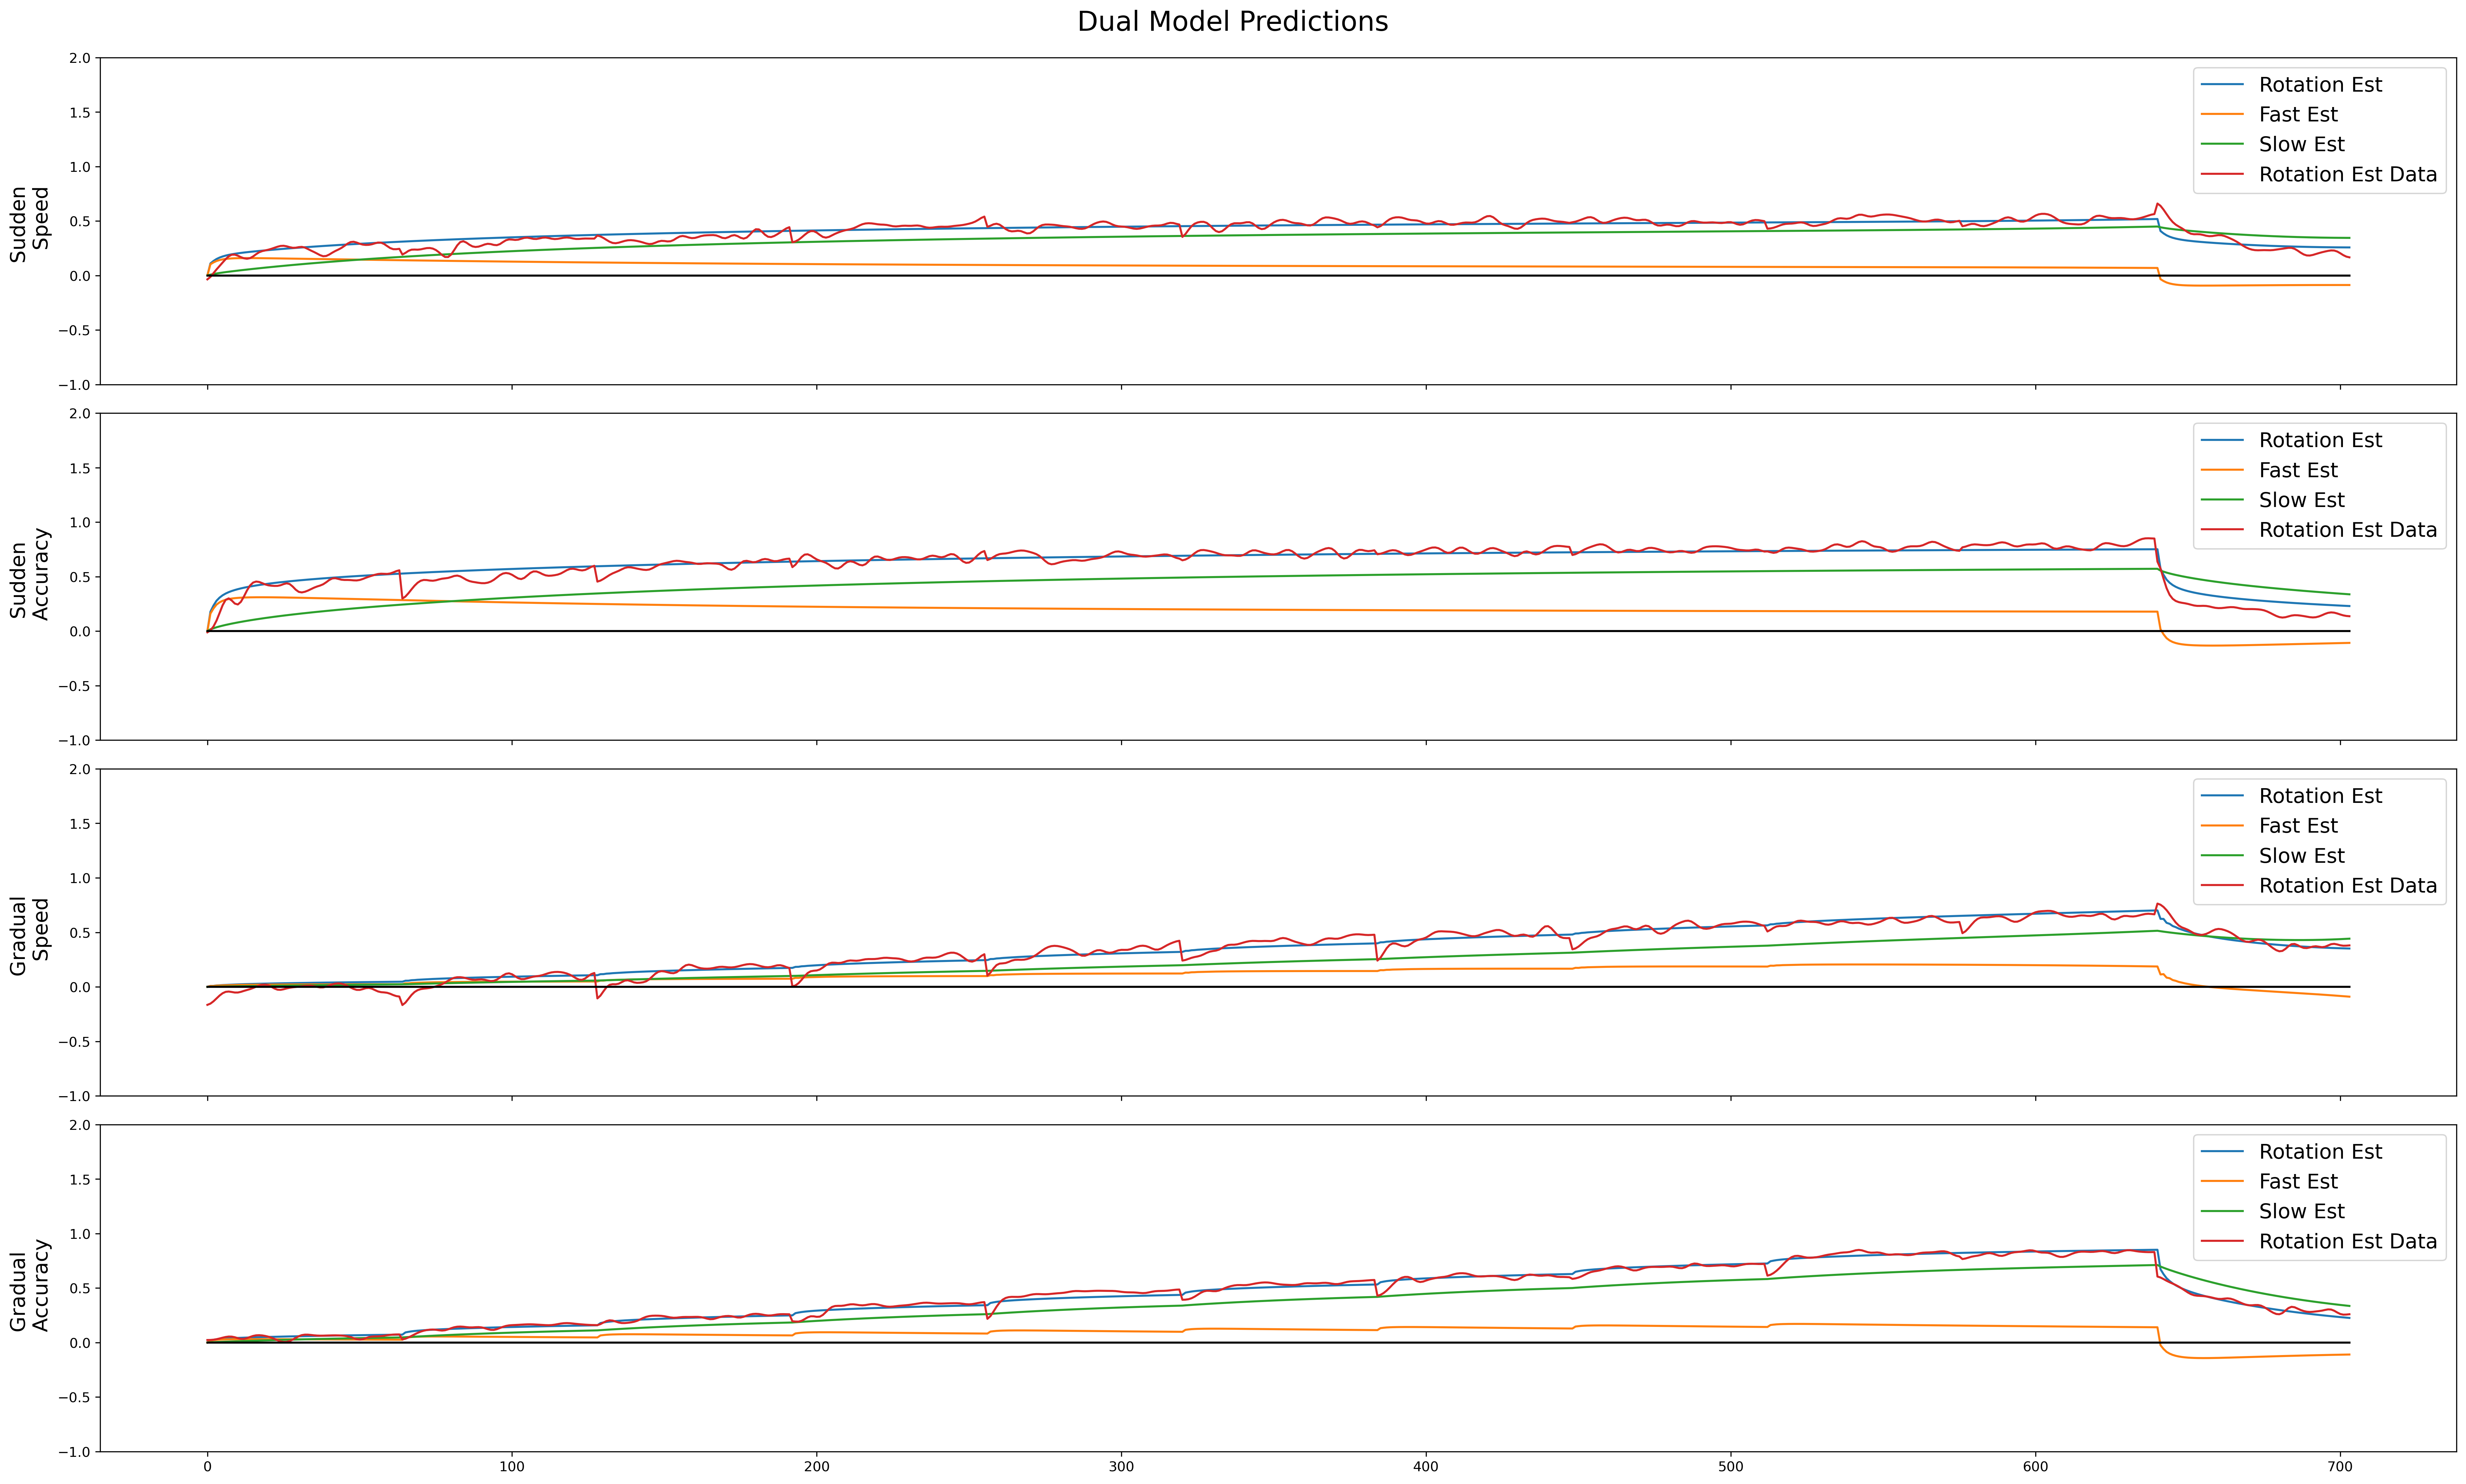

In [117]:
plot_data_vs_fits_dual(curvatures_smooth, fits_dual[:, 0], fits_dual[:, 1], fits_dual[:, 2], fits_dual[:, 3])

In [118]:
def plot_data_vs_fits_single(curvatures_smooth, A, B):
    plt.figure(figsize = (20, 10))
    errors_predict = np.zeros((60, 704))
    fast = np.zeros((60, 704))
    slow = np.zeros((60, 704))
    rotation_est = np.zeros((60, 704))
    corr_coef = np.zeros(60)
    for participant in range(60):
        if participant % 4 == 0 or participant%4 == 1:
            errors_predict[participant], rotation_est[participant] = model_sudden(704, A[participant], B[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]
        else:    
            errors_predict[participant], rotation_est[participant] = model_gradual(704, A[participant], B[participant])
            corr_coef[participant] = np.ma.corrcoef(errors_predict[participant], np.ravel(curvatures_smooth[participant])[64:])[0, 1]

    fig, ax = plt.subplots(4, dpi = 300, sharex = True, constrained_layout = True, figsize = (25, 15))
    plt.setp(ax, ylim=(-1, 2))
    legend_size = 15
    
    for participant in range(4):
        if participant%4 == 0  or participant%4 == 1:
            #plt.plot(np.nanmean(errors_predict[participant::4], axis = 0))
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            l4, = ax[participant].plot(np.append(np.ravel(np.nanmean(1 - curvatures_smooth[participant::4], axis = 0)[1:-1]), np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l4], ['Rotation Est', 'Rotation Est Data'], prop={'size': legend_size})
        else:
            l1, = ax[participant].plot(np.nanmean(rotation_est[participant::4], axis = 0))
            cs = np.zeros((704))
            csm = np.nanmean(curvatures_smooth[participant::4], axis = 0)
            for i in range(9):
                cs[i*64:(i+1)*64] = (i+1)*10/90.0 - csm[i+1]
            cs[576:640] = 1 - csm[10]
            cs[640:] = csm[11]
            l4, = ax[participant].plot(cs)
            #plt.plot(np.append(np.ravel(np.nanmean(90 - curvatures_smooth[participant::4], axis = 0)[1:-1]), -np.ravel(np.nanmean(curvatures_smooth[participant::4], axis = 0)[11])))
            ax[participant].legend([l1, l4], ['Rotation Est', 'Rotation Est Data'], prop = {'size' : legend_size})


        ax[participant].plot(np.zeros(704), color = 'black')
        ax[0].set_ylabel('Sudden \n Speed', fontsize = 15)
        ax[1].set_ylabel('Sudden \n Accuracy', fontsize = 15)
        ax[2].set_ylabel('Gradual \n Speed', fontsize = 15)
        ax[3].set_ylabel('Gradual \n Accuracy', fontsize = 15)
    fig.suptitle('Single state model predictions', fontsize = 20)
    return corr_coef


array([0.53685355, 0.80240791, 0.72502795, 0.78623482, 0.54024292,
       0.62216487, 0.79151605, 0.86105543, 0.17172969, 0.62667231,
       0.78840007, 0.82457738, 0.78065505, 0.83241245, 0.84518087,
       0.8273461 , 0.13667743, 0.66170068, 0.68326871, 0.75737987,
       0.79265985, 0.86890513, 0.35008136, 0.62063477, 0.47782073,
       0.74905153, 0.51750373, 0.75042514, 0.4933031 , 0.81562037,
       0.79556439, 0.89274352, 0.59810042, 0.73903078, 0.83832408,
       0.77413785, 0.63032542, 0.48358961, 0.74761167, 0.87859492,
       0.95734592, 0.53263187, 0.31877416, 0.68695437, 0.84501281,
       0.79356555, 0.85941033, 0.85566268, 0.73292813, 0.57961635,
       0.69357382, 0.55982607, 0.48828263, 0.34457173, 0.37220817,
       0.74285256, 0.6629113 , 0.46791397, 0.70957584, 0.64286254])

<Figure size 1440x720 with 0 Axes>

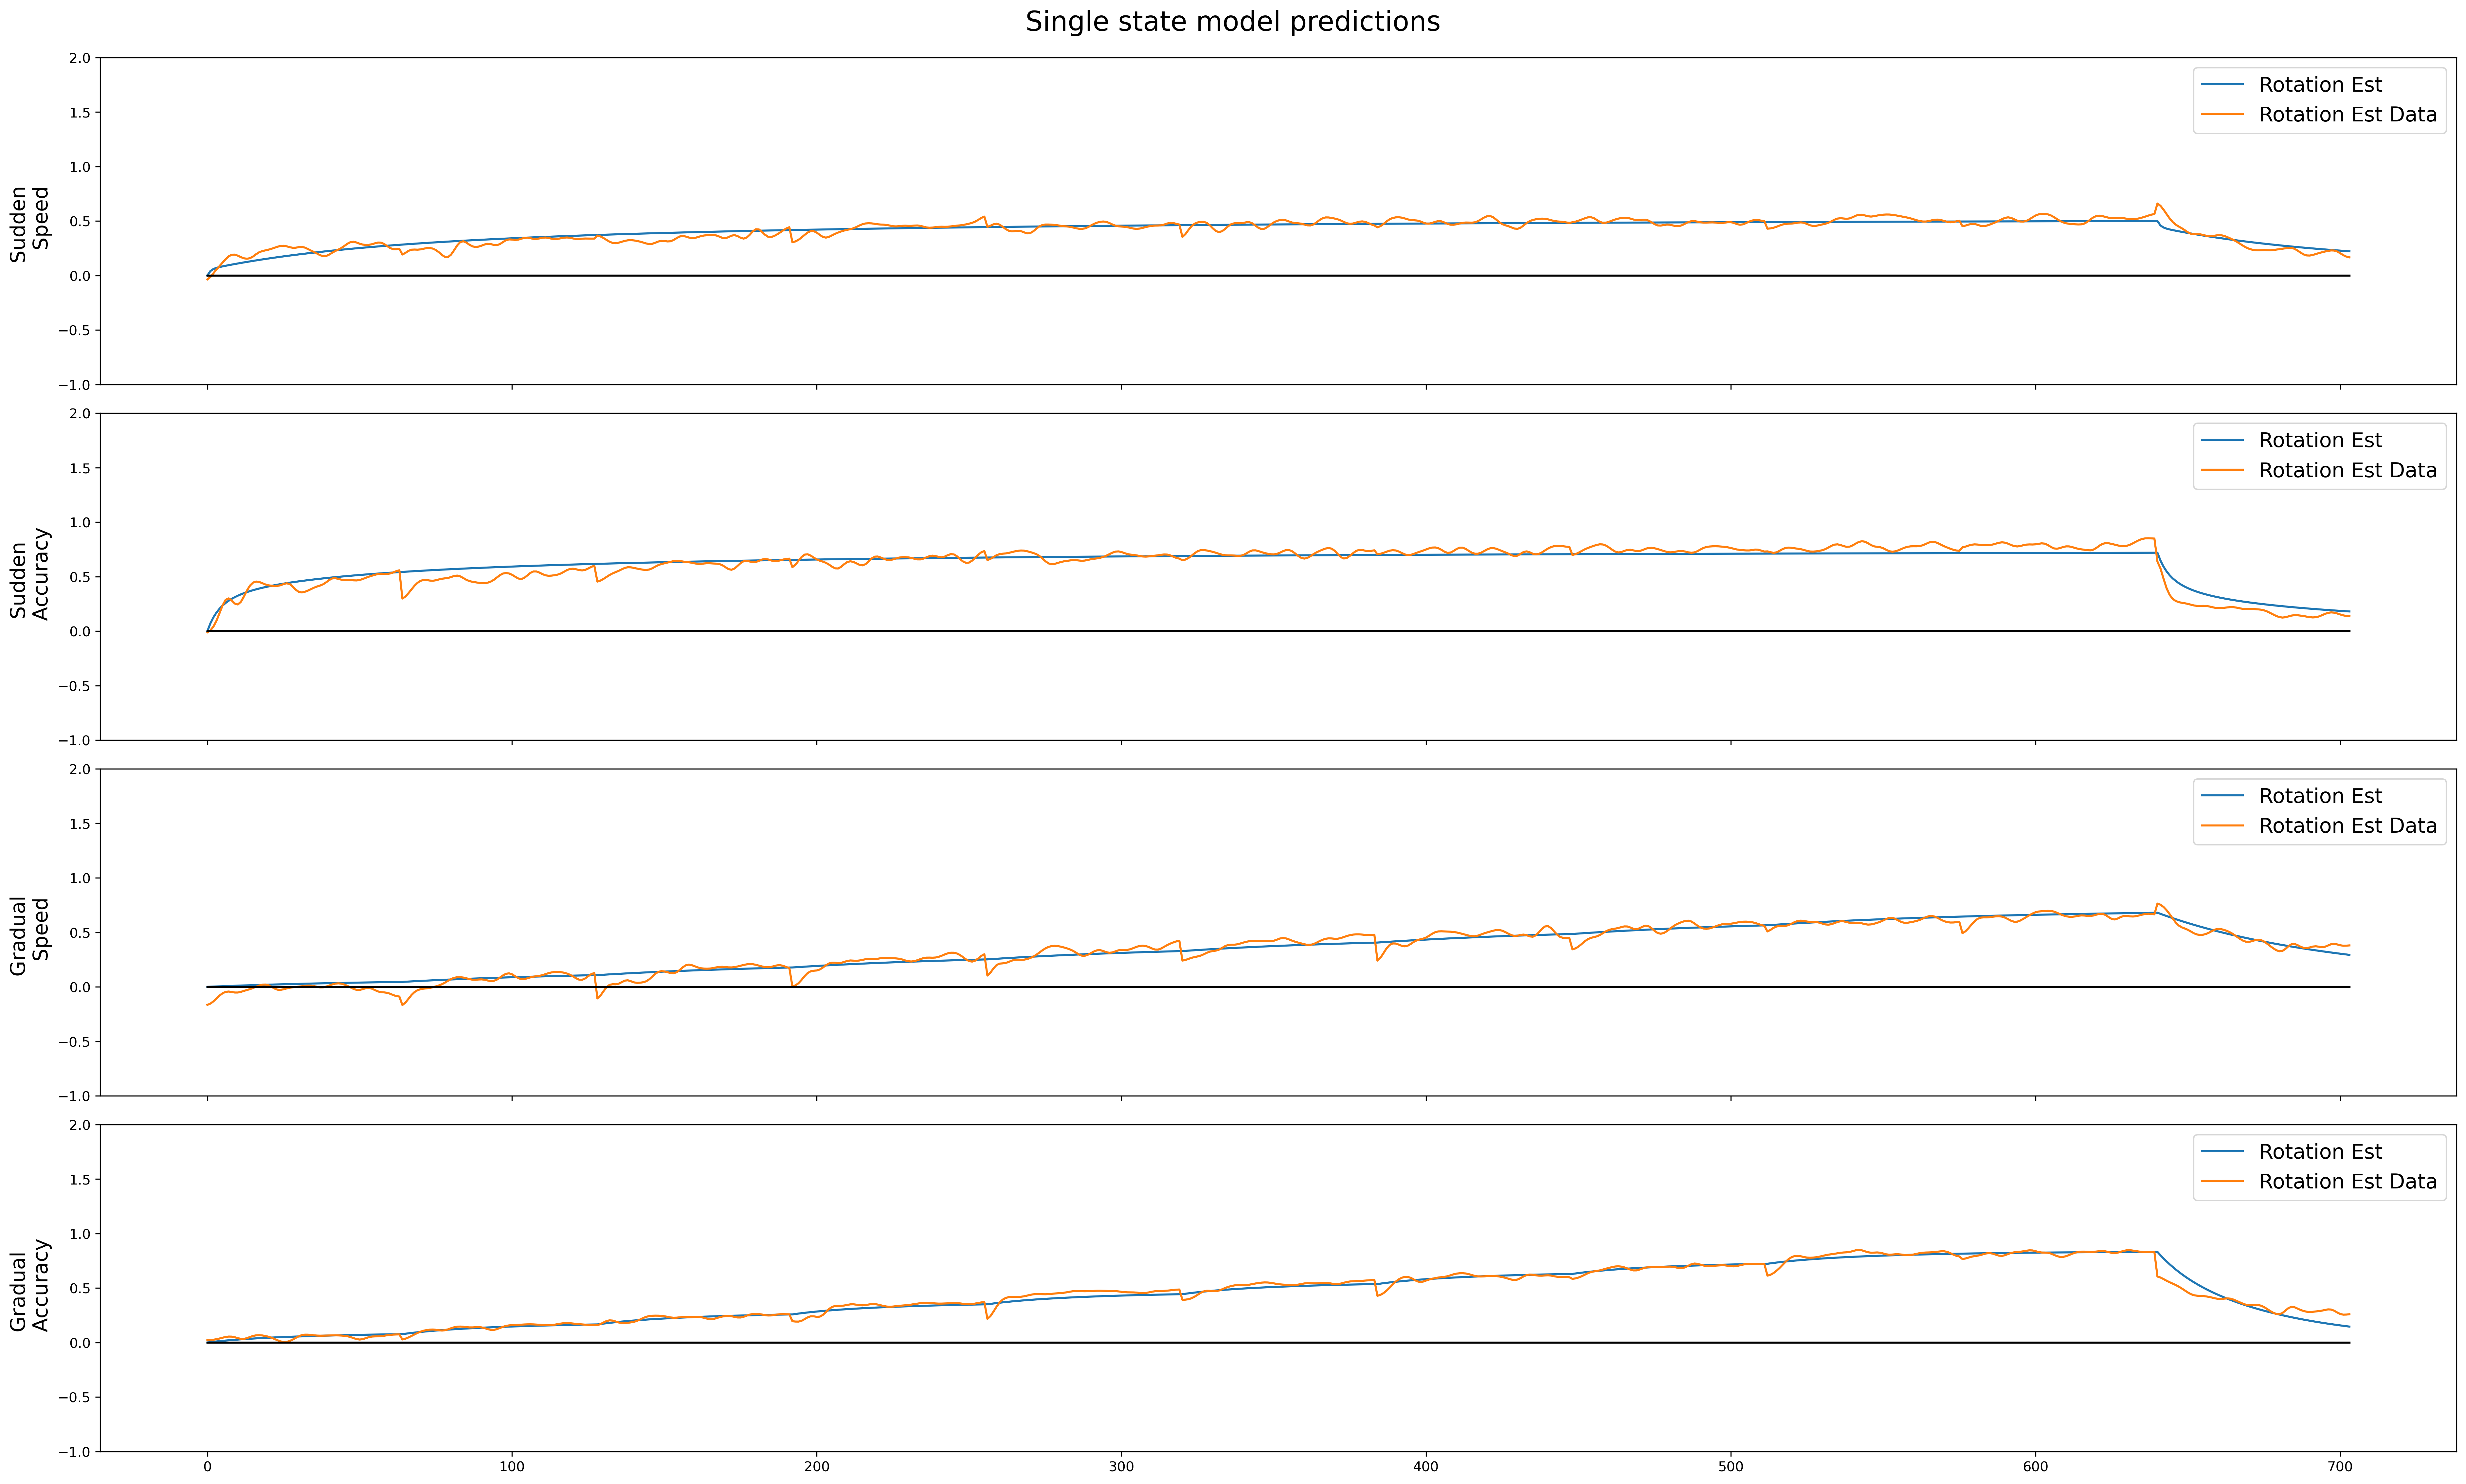

In [119]:
plot_data_vs_fits_single(curvatures_smooth, fits_single[:, 0], fits_single[:, 1])

Text(0, 0.5, 'Mean rmse')

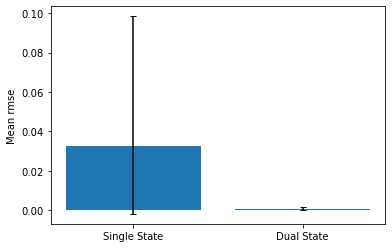

In [13]:
ci_single = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_single_model_recovery[0::4, -1]), scale=stat.sem(fits_single_model_recovery[0::4, -1]))
ci_dual = stat.t.interval(alpha=0.95, df=59, loc=np.mean(fits_dual_model_recovery[:, -1]), scale=stat.sem(fits_dual_model_recovery[:, -1]))
plt.bar(('Single State', "Dual State"), [np.mean(fits_single_model_recovery[:, -1]), np.mean(fits_dual_model_recovery[:, -1])], yerr = ([ci_single[0], ci_dual[0]], [ci_single[1], ci_dual[1]]), capsize = 3)
plt.ylabel('Mean rmse')

In [6]:
group = 3
sum(fits_single[group::4, 2] > fits_dual[group::4, 4])

13

In [6]:
model_errors_dual = np.zeros((100, 60, 704))
model_errors_single = np.zeros((100, 60, 704))

rotation_est_dual = np.zeros((100, 60, 704))
fast_est = np.zeros((100, 60, 704))
slow_est = np.zeros((100, 60, 704))

rotation_est_single = np.zeros((100, 60, 704))
for i in range(100):
    for participant in range(60):
        if participant%4 == 0 or participant%4 == 1:
            model_errors_dual[i][participant], rotation_est_dual[i][participant], fast_est[i][participant], slow_est[i][participant]  = dual_model_sudden(704, fits_dual[i][participant][0], fits_dual[i][participant][1], fits_dual[i][participant][2], fits_dual[i][participant][3])
            
            model_errors_single[i][participant], rotation_est_single[i][participant] = model_sudden(704, fits_single[i][participant][0], fits_single[i][participant][1])
             
        else:
            model_errors_dual[i][participant], rotation_est_dual[i][participant], fast_est[i][participant], slow_est[i][participant] = dual_model_gradual(704, fits_dual[i][participant][0], fits_dual[i][participant][1], fits_dual[i][participant][2], fits_dual[i][participant][3])
            model_errors_single[i][participant], rotation_est_single[i][participant] = model_gradual(704, fits_single[i][participant][0], fits_single[i][participant][1])
        

<AxesSubplot:>

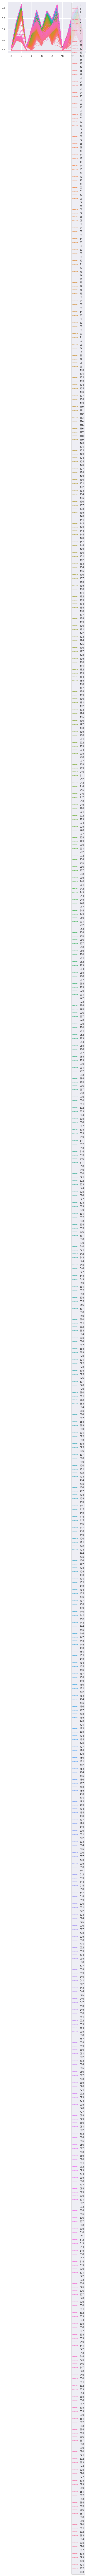

In [26]:
sns.lineplot(data = rotation_est_dual[0][0::4])

In [6]:
dual_train_pred = np.zeros((100, 60, 634))
dual_test_pred = np.zeros((100, 60, 70))

single_train_pred = np.zeros((100, 60, 634))
single_test_pred = np.zeros((100, 60, 70))

train_data = np.zeros((100, 60, 634))
test_data = np.zeros((100, 60, 70))

ll_single_train = np.zeros((100, 60))
ll_dual_train = np.zeros((100, 60))

ll_single_test = np.zeros((100, 60))
ll_dual_test = np.zeros((100, 60))

#train_indices = fits_dual[:, -1]
for i in range(100):
    for participant in range(60):
        dual_train_pred[i][participant] = model_errors_dual[i][participant][fits_dual[i][participant, -1]]
        dual_test_pred[i][participant] = np.delete(model_errors_dual[i][participant], fits_dual[i][participant, -1])

        single_train_pred[i][participant] = model_errors_single[i][participant][fits_single[i][participant, -1]]
        single_test_pred[i][participant] = np.delete(model_errors_single[i][participant], fits_single[i][participant, -1])

        train_data[i][participant] = np.ravel(curvatures_smooth[participant][1:])[fits_dual[i][participant, -1]]
        test_data[i][participant] = np.delete(np.ravel(curvatures_smooth[participant][1:]), fits_dual[i][participant, -1])

        ll_single_train[i][participant] = sum(stat.norm.logpdf(train_data[i][participant], single_train_pred[i][participant], fits_single[i][participant,-2]))
        ll_dual_train[i][participant] = sum(stat.norm.logpdf(train_data[i][participant], dual_train_pred[i][participant], fits_dual[i][participant,-2]))

        ll_single_test[i][participant] = sum(stat.norm.logpdf(test_data[i][participant], single_test_pred[i][participant], fits_single[i][participant,-2]))
        ll_dual_test[i][participant] = sum(stat.norm.logpdf(test_data[i][participant], dual_test_pred[i][participant], fits_dual[i][participant,-2]))
    
#model_errors_dual[0][fits_dual[0, -1]]

In [140]:
total = np.zeros(100)
groupwise = np.zeros((100, 4))
for i in range(100):
    total = sum(ll_single_test[i] < ll_dual_test[i])
    for group in range(4):
        groupwise[i][group] = sum(ll_single_test[i][group::4] < ll_dual_test[i][group::4])
        


In [186]:
np.ravel(np.row_stack((np.sum(ll_single_test < ll_dual_test, axis = 0)[0::4], np.sum(ll_single_test < ll_dual_test, axis = 0)[1::4], np.sum(ll_single_test < ll_dual_test, axis = 0)[2::4], np.sum(ll_single_test < ll_dual_test, axis = 0)[3::4])))

array([ 34,  65,  94,  68,  40,  94,  63,  72,  70,  88,  92,  80,  58,
        93,  47,  83,  87,  86,  73,  87, 100, 100,  67,  86,  90, 100,
        34,  88,  90,  97,  87, 100,  90,  92,  94,  73, 100,  77,  94,
        93,  51,  81,  98,  84,  94,  99, 100,  99,  99, 100,  99,  95,
       100,  98, 100, 100, 100, 100,  97,  95])

In [188]:
groupwise_wide = pd.DataFrame({'SS': np.sum(ll_single_test < ll_dual_test, axis = 0)[0::4],
                               'SA':np.sum(ll_single_test < ll_dual_test, axis = 0)[1::4],
                               'GS':np.sum(ll_single_test < ll_dual_test, axis = 0)[2::4],
                               'GA':np.sum(ll_single_test < ll_dual_test, axis = 0)[3::4]})
groupwise_long = pd.melt(groupwise_wide, var_name="Group", value_name="Dual_Selected")
groupwise_aov = pd.DataFrame({'Rotation': np.ravel(np.row_stack((np.repeat('Sudden', 30), np.repeat('Gradual', 30)))),
                             'Emphasis': np.ravel(np.row_stack((np.repeat('Speed', 15), np.repeat('Accuracy', 15), np.repeat('Speed', 15), np.repeat('Accuracy', 15)))),
                              'Dual_Selects': np.ravel(np.row_stack((np.sum(ll_single_test < ll_dual_test, axis = 0)[0::4], np.sum(ll_single_test < ll_dual_test, axis = 0)[1::4], np.sum(ll_single_test < ll_dual_test, axis = 0)[2::4], np.sum(ll_single_test < ll_dual_test, axis = 0)[3::4])))
                             })

<AxesSubplot:xlabel='Group', ylabel='Dual_Selected'>

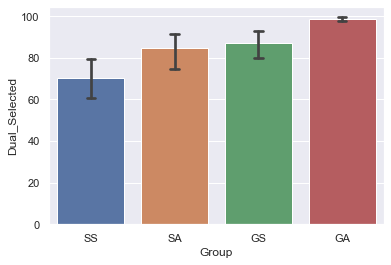

In [166]:
sns.barplot(x = 'Group', y = "Dual_Selected", data=groupwise_long, capsize=0.1)

In [189]:
model = smf.ols('Dual_Selects ~ Rotation*Emphasis', data=groupwise_aov).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
Rotation,3572.816667,1.0,16.885907,0.000131
Emphasis,2444.816667,1.0,11.554734,0.001251
Rotation:Emphasis,22.816667,1.0,0.107837,0.743846
Residual,11848.800000,56.0,NaN,NaN


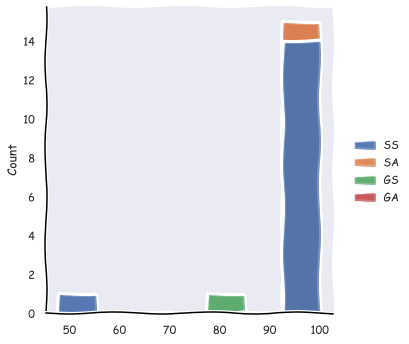

In [153]:
with plt.xkcd():
    sns.displot(groupwise_wide)


In [154]:
groupwise_long['Subject id'] = range(60)

In [155]:
sid = groupwise_long['Subject id']
groupwise_long.insert(0, 'id', sid)
groupwise_long.drop(labels=['Subject id'], axis=1,inplace = True)

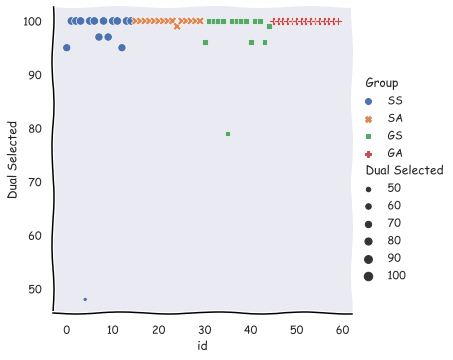

In [156]:
with plt.xkcd():
    sns.relplot(x = 'id', y = 'Dual Selected', hue = 'Group', size = 'Dual Selected', style = 'Group', data = groupwise_long)

<AxesSubplot:xlabel='Group', ylabel='Dual Selected'>

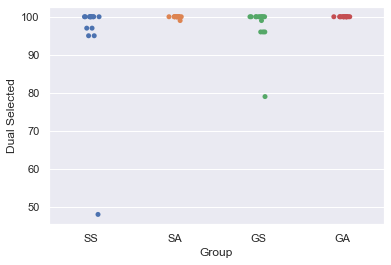

In [157]:
sns.stripplot(x = 'Group', y = 'Dual Selected', data = groupwise_long)


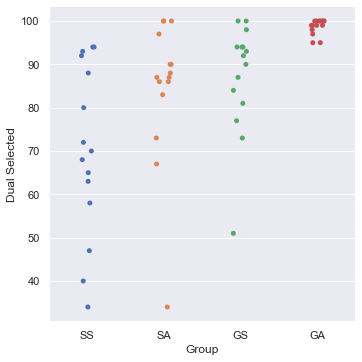

In [128]:
sns.catplot(x = 'Group', y = 'Dual Selected', data = groupwise_long)

In [15]:
AIC_single_train = -2*ll_single_train + 2*3
AIC_single_test = -2*ll_single_test + 2*3

AIC_dual_train = -2*ll_dual_train + 2*5
AIC_dual_test = -2*ll_dual_test + 2*5

BIC_single_train = -2*ll_single_train + np.log(634)*3
BIC_single_test = -2*ll_single_test + np.log(70)*3

BIC_dual_train = -2*ll_dual_train + np.log(634)*5
BIC_dual_test = -2*ll_dual_test + np.log(70)*5



In [61]:
selected = pd.DataFrame({'Sudden Speed': np.sum(ll_dual_test[:, 0::4] < ll_single_test[:, 0::4], axis = 0),
                        'Sudden Accuracy': np.sum(ll_dual_test[:, 1::4] < ll_single_test[:, 1::4], axis = 0),
                        'Gradual Speed': np.sum(ll_dual_test[:, 2::4] < ll_single_test[:, 2::4], axis = 0),
                        'Gradual Accuracy': np.sum(ll_dual_test[:, 3::4] < ll_single_test[:, 3::4], axis = 0)})


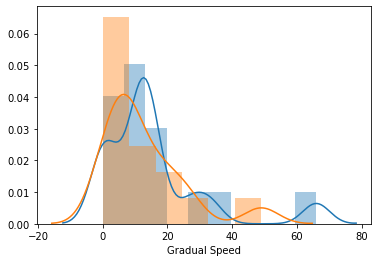

In [65]:
sns.distplot(selected['Sudden Accuracy'])
#sns.distplot(100- selected['Gradual Speed'])

sns.distplot(selected['Gradual Speed'])
#sns.distplot(100- selected['Sudden Accuracy'])


In [27]:
print ("Selecting Single state model: Overall")
#print("AIC on Test: ", sum(AIC_single_test < AIC_dual_test))
#print("BIC on test: ", sum(BIC_single_test < BIC_dual_test))
print ("LLs on Test: ", sum(ll_dual_test < ll_single_test))

#print("AIC on Train: ", sum(AIC_single_train < AIC_dual_train))
#print("BIC on Train: ", sum(BIC_single_train < BIC_dual_train))
#print ("LLs on Train: ", sum(ll_dual_train < ll_single_train))


group = 1

print ("Selecting Single state model: ")
#print ("AIC on Test: ", sum(AIC_single_test[group::4] < AIC_dual_test[group::4]))
#print ("BIC on Test: ", sum(BIC_single_test[group::4] < BIC_dual_test[group::4]))
print ("LLs on Test: ", sum(ll_dual_test[:, group::4] < ll_single_test[:, group::4]))

#print ("AIC on Train: ", sum(AIC_single_train[group::4] < AIC_dual_train[group::4]))
#print ("BIC on Train: ", sum(BIC_single_train[group::4] < BIC_dual_train[group::4]))
#print ("LLs on Train: ", sum(ll_dual_train[group::4] < ll_single_train[group::4]))


Selecting Single state model: Overall
LLs on Test:  [66 17 13  1 35 13  0  0  6 14 10  1 32 27  8  1 60 13  6  0  6  0 27  1
 37  0  0  5 28 33 23  0 30 14  6  2 12 10  7  0  8  0 49  0 20 66 19  0
 42 12  2  0  7 10 16  3 53  3  6  5]
Selecting Single state model: 
LLs on Test:  [17 13 14 27 13  0  0 33 14 10  0 66 12 10  3]


In [10]:
pval_dual = np.zeros(60)
pval_single = np.zeros(60)
G = np.zeros(60)
for participant in range(60):
    G[participant] = fits_dual[participant, -1] - fits_single[participant, -1]
    if G[participant] > 0:
        pval_single[participant] = stat.chi2.sf(G[participant], 2)
    else:
        pval_dual[participant] = stat.chi2.sf(-G[participant], 2)

ValueError: setting an array element with a sequence.

In [60]:
np.sum(pval_dual[np.nonzero(pval_dual)] < 0.05/60)

34

In [19]:
np.sum(pval_single[np.nonzero(pval_single[2::4])[0]] < 0.05/60)

5

In [220]:
sum(np.nonzero(pval_dual[np.nonzero(pval_dual)] < 0.05/60)[0]%4 == 3)

3

In [61]:
np.sum(pval_dual[np.where(pval_dual > 0)[0][np.where(pval_dual > 0)[0]%4 == 3]] < 0.05/60)

14

In [63]:
mse_dual_groups = np.zeros(4)
mse_single_groups = np.zeros(4)
mse_dual_groups_recovery = np.zeros(4)
mse_single_groups_recovery = np.zeros(4)

for group in range(4):
    mse_dual_groups[group] = mean_squared_error(np.ravel(model_errors_dual[group::4, 640:]), np.ravel(curvatures_smooth[group::4,-1]))
    mse_dual_groups_recovery[group] = mean_squared_error(np.ravel(model_errors_single[group::4]), np.ravel(model_errors_dual_recovery[group::4]))
    
    mse_single_groups[group] = mean_squared_error(np.ravel(model_errors_single[group::4, 640:]), np.ravel(curvatures_smooth[group::4,-1]))
    mse_single_groups_recovery[group] = mean_squared_error(np.ravel(model_errors_dual[group::4]), np.ravel(model_errors_single_recovery[group::4]))
    
mse_duals = mean_squared_error(np.ravel(model_errors_dual[:, 640:]), np.ravel(curvatures_smooth[:, -1]))
mse_singles = mean_squared_error(np.ravel(model_errors_single[:, 640:]), np.ravel(curvatures_smooth[:, -1]))


In [85]:
AIC_single = np.zeros((4, 15))
BIC_single = np.zeros((4, 15))
AIC_dual = np.zeros((4, 15))
BIC_dual = np.zeros((4, 15))

mse_dual = np.zeros(60)
mse_single = np.zeros(60)


rss_dual = np.sum(model_errors_dual[:, :640] - np.reshape(curvatures_smooth[:, 1:-1], (60, 640)), axis = 1)**2
rss_single = np.sum(model_errors_single[:, :640] - np.reshape(curvatures_smooth[:, 1:-1], (60, 640)), axis = 1)**2

for group in range(4):
    AIC_dual[group] = 2*4 + 2*fits_dual[group::4, -1]
    BIC_dual[group] = np.log(704)*4 + fits_dual[group::4, -1]


    AIC_single[group]  = 2*2 + 2*fits_single[group::4, -1]
    BIC_single[group] = np.log(704)*2 + np.log(fits_single[group::4, -1])


In [91]:
np.sum(AIC_dual[3] < AIC_single[3])

7

In [49]:
np.sum(AIC_dual < AIC_single)

23

In [76]:
sum(fits_dual[:, -1])

738.2327615786689

In [77]:
sum(fits_single[:, -1])

826.2765964411491

In [46]:
np.shape(curvatures_smooth[:, -1])

(60, 64)

In [49]:
fits_single[48, -1]

50.24349663838527

In [29]:
r2_score(np.ravel(model_errors_dual), np.ravel(curvatures_smooth[:, 1:]))

-1.8435942015295161

In [30]:
r2_score(np.ravel(model_errors_single), np.ravel(curvatures_smooth[:, 1:]))

-1.7878687798910495

In [61]:
from scipy.ndimage import gaussian_filter1d
curvatures_smooth = gaussian_filter1d(curvatures, sigma = 2)
pickle.dump(curvatures_smooth, open('curvatures_smooth.pickle', 'wb'))

In [312]:
pval_dual.nonzero()

(array([ 0,  2,  4, 10, 13, 14, 16, 18, 24, 27, 28, 29, 30, 32, 34, 38, 40,
        42, 44, 45, 46, 48, 56, 58], dtype=int64),)

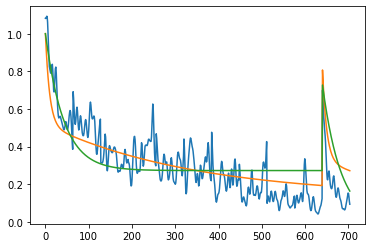

In [58]:
participant = 25
plt.plot(np.ravel(curvatures_smooth[participant][1:]))
plt.plot(model_errors_dual[participant])
plt.plot(model_errors_single[participant])

In [47]:
fits_dual[0, 5]

10.503401873917536

In [49]:
fits_single[0, 3]

-82.73038327528457

93.2337851492021